In [4]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

In [5]:
LENGTH = 2000
mpl.rcParams['figure.dpi'] = 200

In [6]:
pikachu = pd.read_csv('data/pikachu_complete.csv')
bulbasaur = pd.read_csv('data/bulbasaur_complete.csv')
pikachu = pikachu.sample(n=LENGTH, random_state=1)
bulbasaur = bulbasaur.sample(n=LENGTH, random_state=1)

In [7]:
pikachu_vals = pikachu[['Red', 'Green', 'Blue']]
bulbasaur_vals = bulbasaur[['Red', 'Green', 'Blue']]

In [8]:
pikachu_scaler = MinMaxScaler(feature_range=(0, 255))
bulbasaur_scaler = MinMaxScaler(feature_range=(0, 255))

In [9]:
pikachu_vals_scaled = pd.DataFrame(pikachu_scaler.fit_transform(pikachu_vals), columns=pikachu_vals.columns)
bulbasaur_vals_scaled = pd.DataFrame(bulbasaur_scaler.fit_transform(bulbasaur_vals), columns=bulbasaur_vals.columns)

In [10]:
def draw_colors_histogram(df):
    """
    Draws the leading colors plot.
    :param hist: histogram of color labels
    """
    # the first two values of np.zeros(...) represent the length of the plot
    # the 3 is because of RGB
    plot_length = 150
    plot = np.zeros((plot_length, LENGTH, 3), dtype="uint8")
    start = 0

    colors = []
    
    # , x[1]['Green'], x[1]['Blue']
    for idx, val in enumerate(sorted(df.to_numpy(), key=lambda x: (x[0]), reverse=True)):
        cv2.rectangle(plot, (int(idx), 0), (int(idx+1), plot_length),
                      color=list(val), thickness=-1)

    plt.axis("off")
    plt.imshow(plot)
    plt.show()

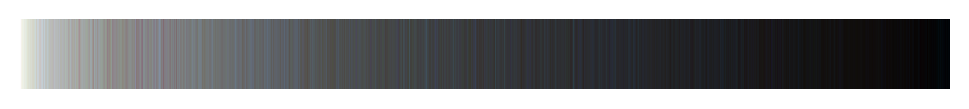

In [11]:
draw_colors_histogram(pikachu_vals_scaled)

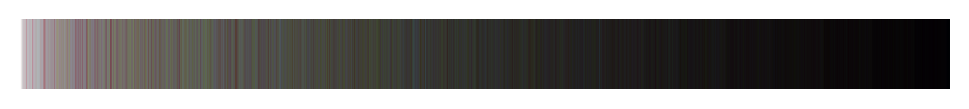

In [12]:
draw_colors_histogram(bulbasaur_vals_scaled)

In [13]:
def draw_3d_plot(colors):
    r, g, b = zip(*colors)
    r = np.array(r) / 255.0
    g = np.array(b) / 255.0
    b = np.array(b) / 255.0

    x = np.array(colors)
    print(x/255.0)

    fig = plt.figure()
    ax = Axes3D(fig)
    # range is 0 to 1
    ax.scatter(r, g, b, c=x/256.0)
    ax.set_title("Pixel 3D plot")
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    fig.set_size_inches(14, 8)
    plt.show()

[[0.18987342 0.18064516 0.14563107]
 [0.46202532 0.43870968 0.41747573]
 [0.20886076 0.21290323 0.23300971]
 ...
 [0.43037975 0.40645161 0.41747573]
 [0.08227848 0.07096774 0.06796117]
 [0.59493671 0.61290323 0.58252427]]


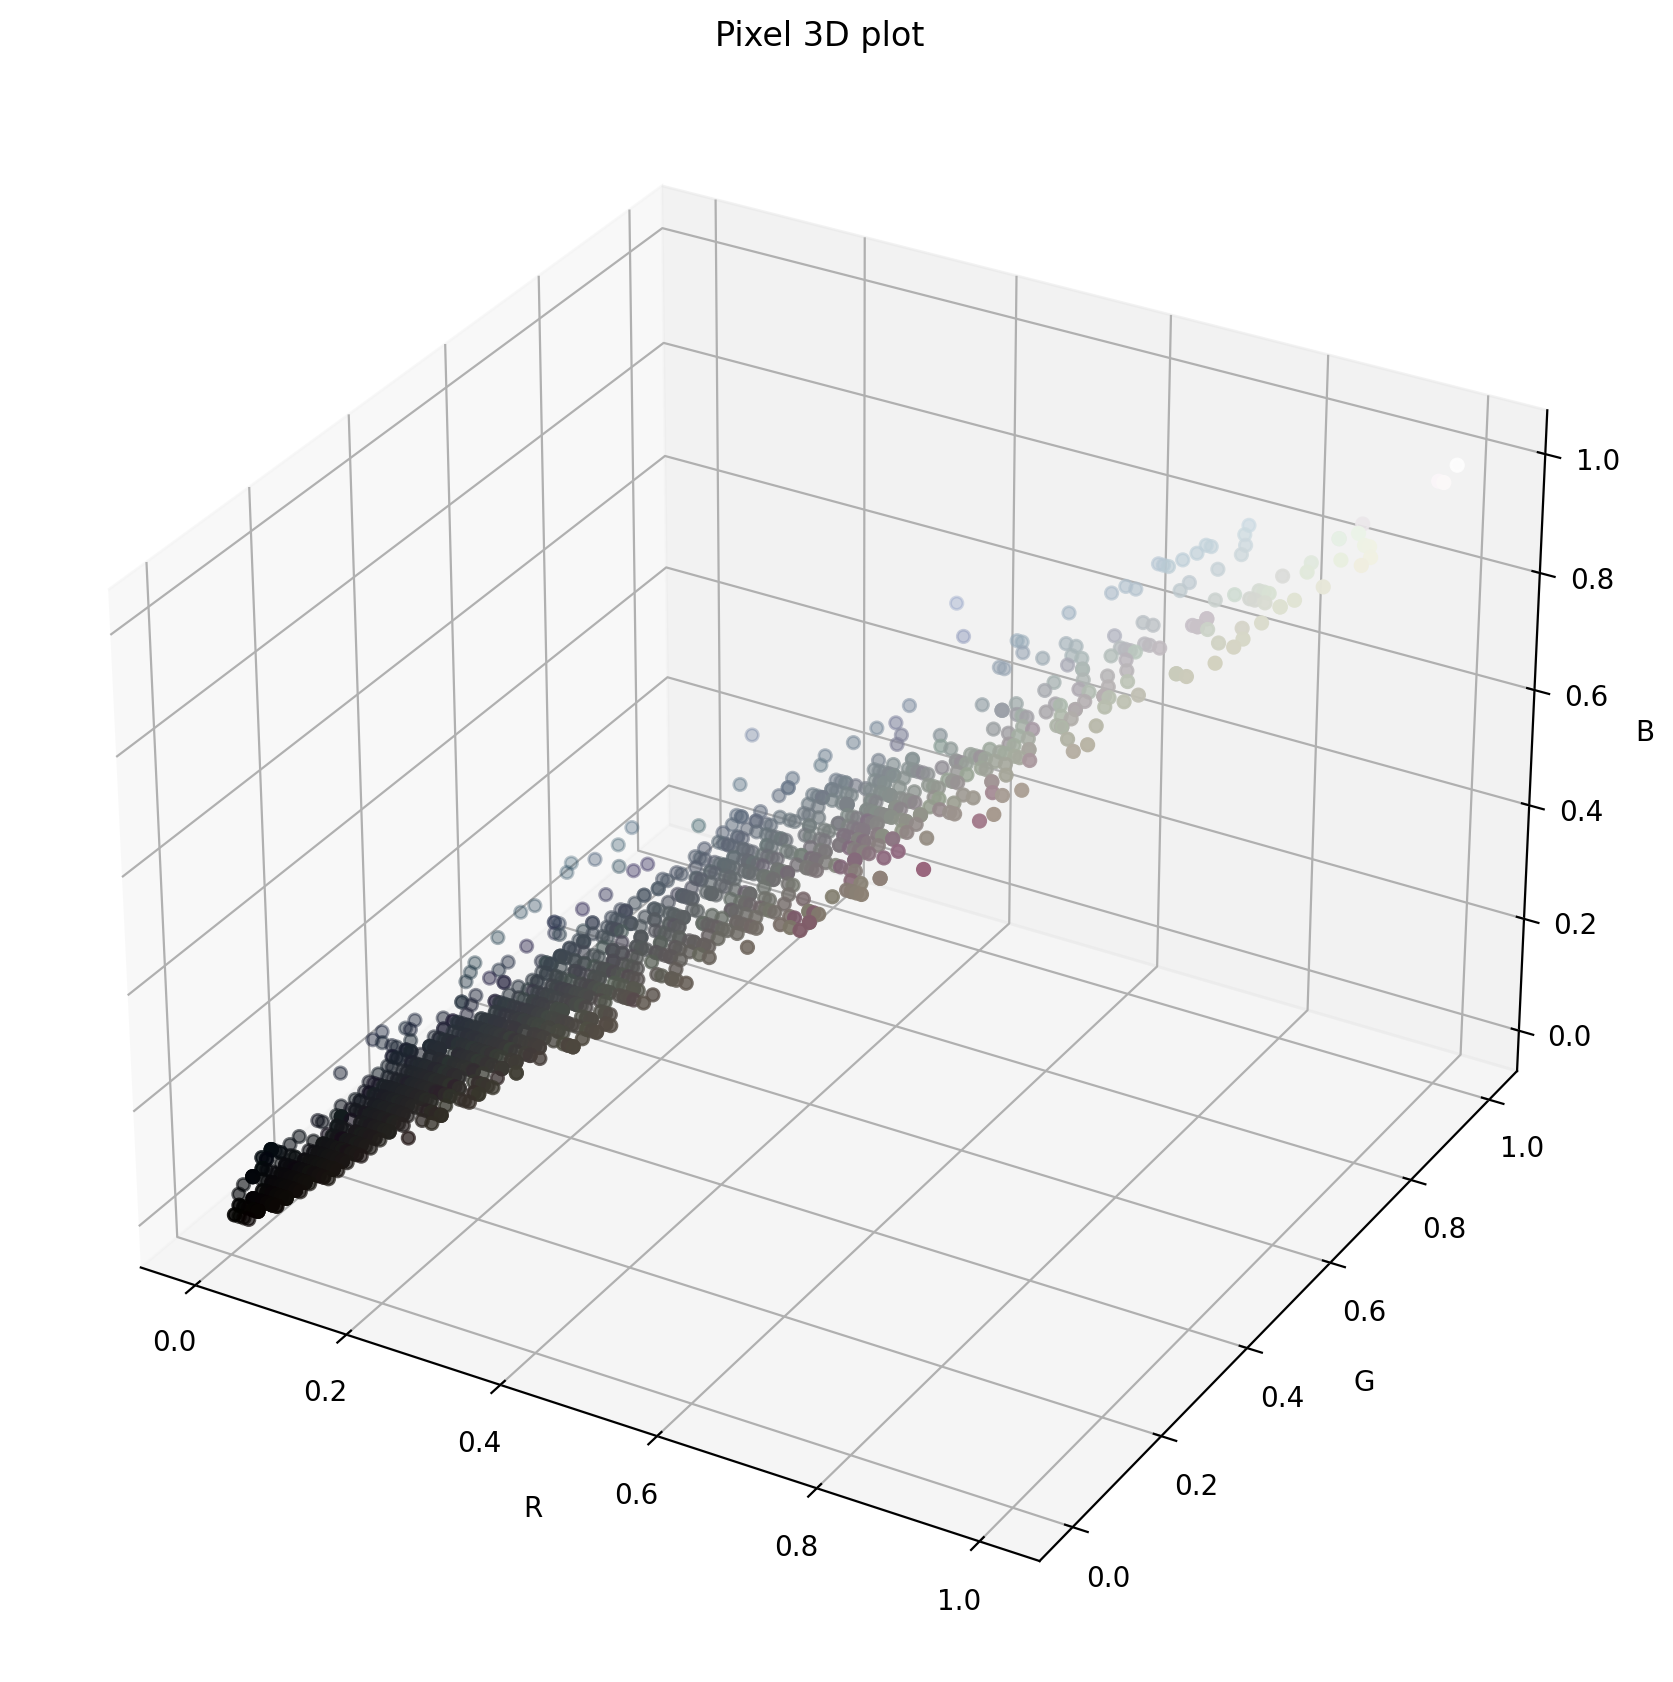

In [14]:
draw_3d_plot(pikachu_vals_scaled.to_numpy())

[[0.13043478 0.11904762 0.10144928]
 [0.26086957 0.30952381 0.23188406]
 [0.52173913 0.52380952 0.55797101]
 ...
 [0.2173913  0.22222222 0.15217391]
 [0.63768116 0.63492063 0.63768116]
 [0.17391304 0.19047619 0.19565217]]


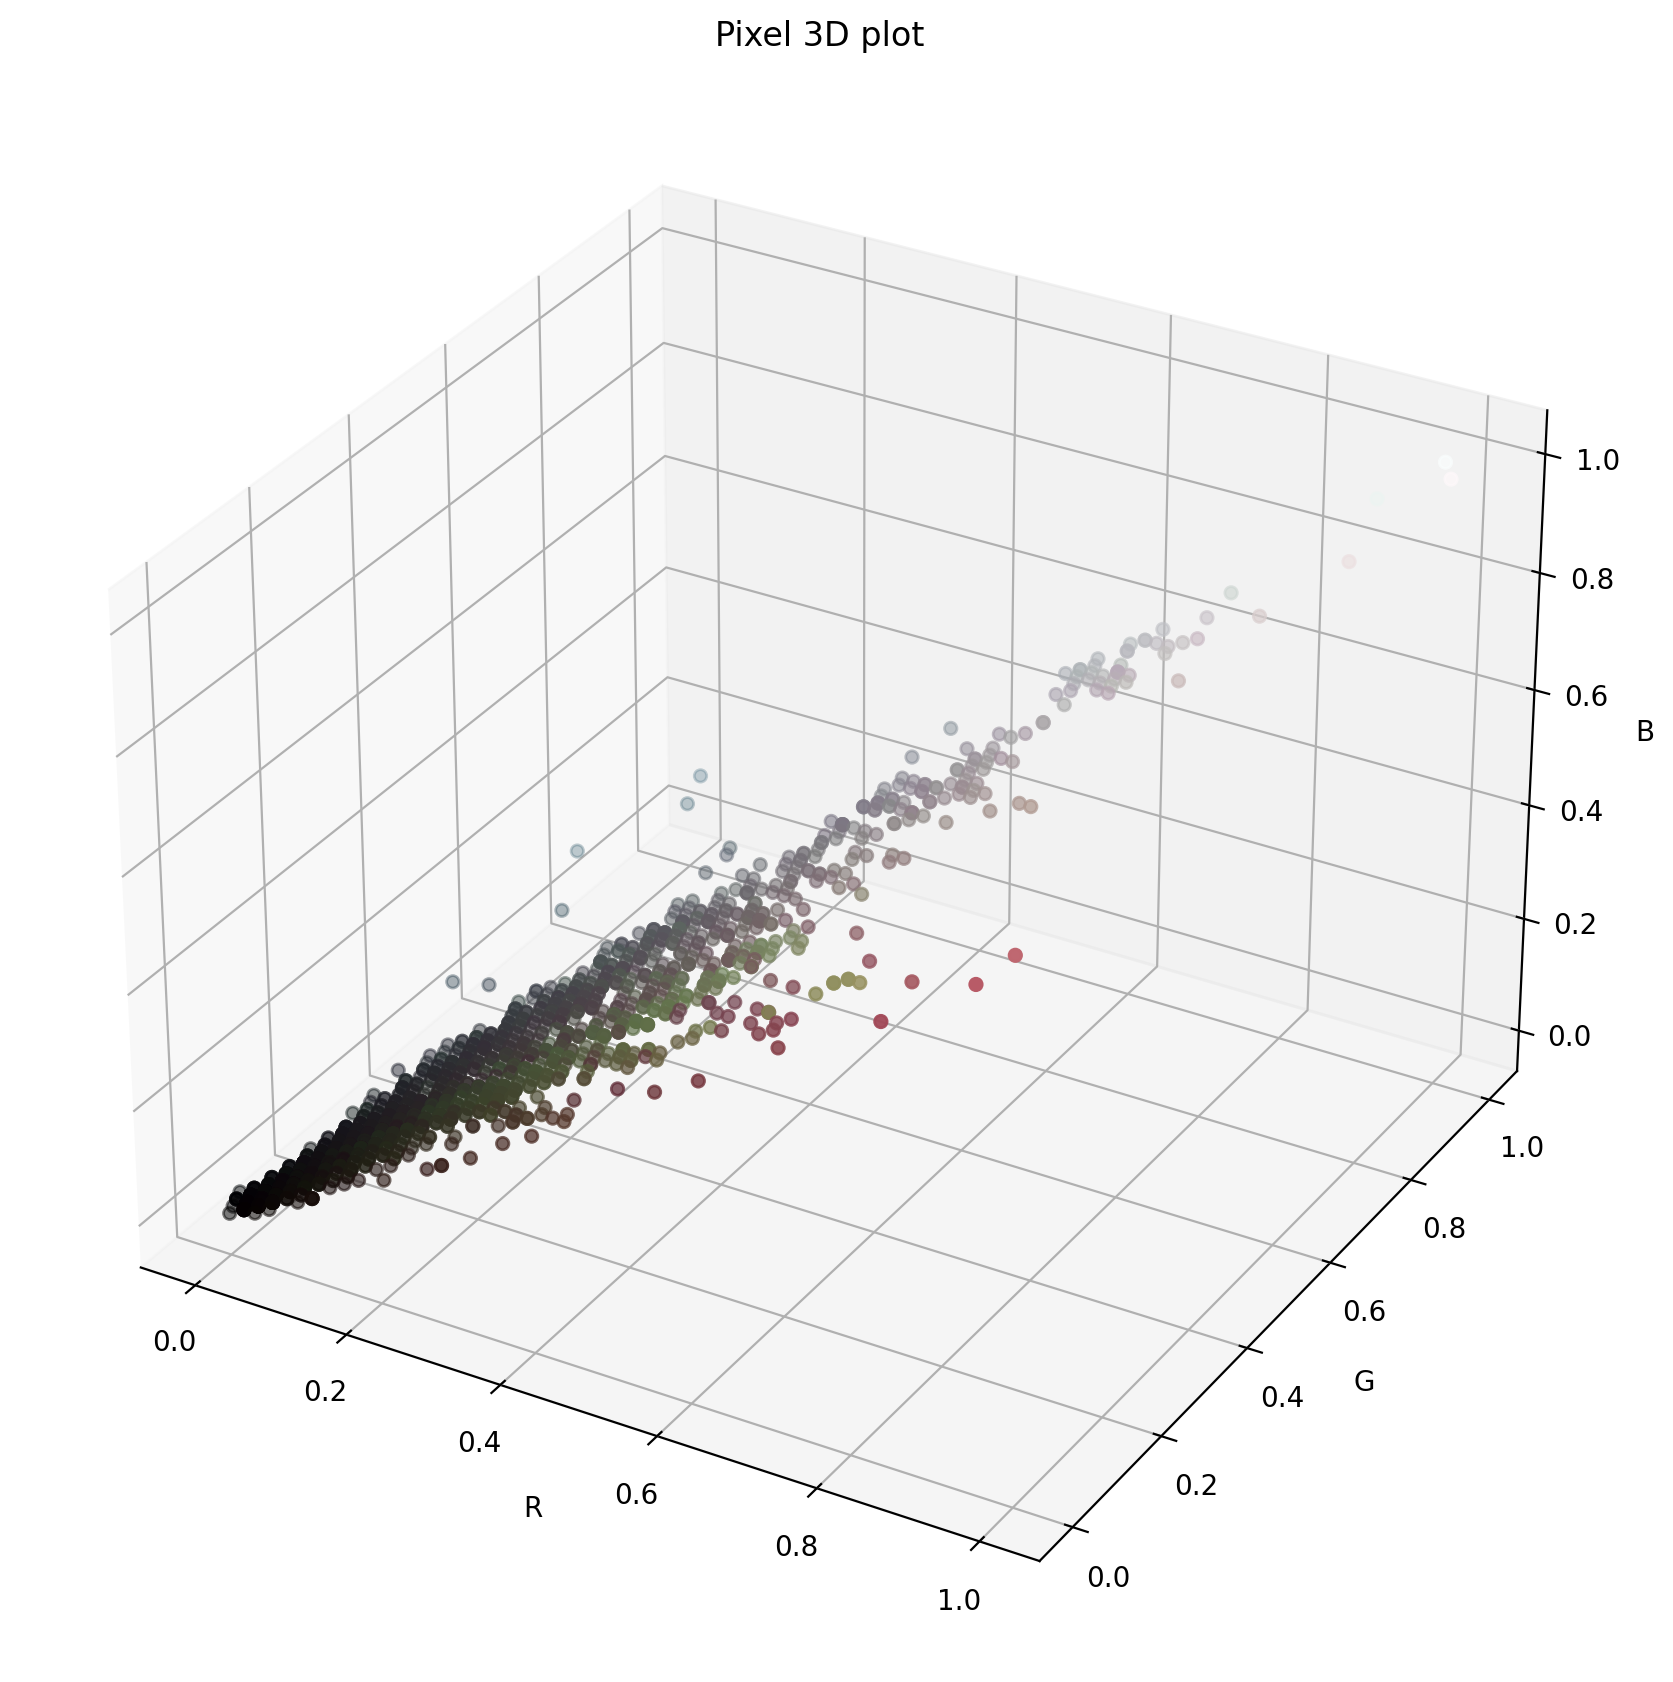

In [15]:
draw_3d_plot(bulbasaur_vals_scaled.to_numpy())